# Preliminary baseline

In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('data.csv')
df.head()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [5]:
df.describe()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
count,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.00000,29332.000000,...,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000
mean,0.226033,0.034263,0.045888,0.013603,0.005762,0.171690,0.060071,0.014114,0.11080,0.043741,...,0.029660,0.003887,0.033445,0.034297,0.949032,0.023728,0.023387,0.051718,0.003648,0.501159
std,0.418268,0.181907,0.209247,0.115837,0.075688,0.377117,0.237622,0.117964,0.31389,0.204521,...,0.169652,0.062222,0.179798,0.181994,0.219937,0.152204,0.151133,0.221461,0.060289,0.500007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(29332, 87)

In [7]:
df['Result'].value_counts()

1    14700
0    14632
Name: Result, dtype: int64

In [8]:
y = df['Result']
X = df.drop(labels=['Result'], axis=1)


In [9]:
y.shape
X.shape

(29332, 86)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=69)

In [11]:
X_train.shape

(20532, 86)

In [12]:
y_train.shape

(20532,)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [14]:
model_objs = [LogisticRegression(), KNeighborsClassifier(), SVC(kernel='linear'), SVC(kernel='rbf'), SVC(kernel='poly'), DecisionTreeClassifier(), AdaBoostClassifier(), RandomForestClassifier(), XGBClassifier(random_state=69)]
model_names = ['LogisticRegression', 'KNeighborsClassifier', 'Linear SVC', 'Gaussian SVC', 'Polynomial SVC', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'XGBClassifier']

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [16]:
for m_obj, m_name in zip(model_objs, model_names):
    m_obj.fit(X_train, y_train),
    y_pred = m_obj.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    roc_auc = roc_auc_score(y_pred, y_test)
    print('MODEL: {}'.format(m_name))
    print('Accuracy: {}'.format(acc))
    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))
    print('F1: {}'.format(f1))
    print('ROC AUC: {}'.format(roc_auc))
    print()
    print()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL: LogisticRegression
Accuracy: 0.9563636363636364
Precision: 0.9668660837551771
Recall: 0.9459702836560108
F1: 0.9563040509786072
ROC AUC: 0.9564638017637557


MODEL: KNeighborsClassifier
Accuracy: 0.961590909090909
Precision: 0.9687068568798896
Recall: 0.9542157751586582
F1: 0.9614067138616122
ROC AUC: 0.961611078098928


MODEL: Linear SVC
Accuracy: 0.9520454545454545
Precision: 0.9604233778186838
Recall: 0.9434900542495479
F1: 0.9518814139110605
ROC AUC: 0.9520923763021049


MODEL: Gaussian SVC
Accuracy: 0.9634090909090909
Precision: 0.9677864703175334
Recall: 0.9585232452142206
F1: 0.9631325852988321
ROC AUC: 0.9633958021175364


MODEL: Polynomial SVC
Accuracy: 0.9581818181818181
Precision: 0.9590427979751496
Recall: 0.9564020192748968
F1: 0.9577205882352942
ROC AUC: 0.9581649898265524


MODEL: DecisionTreeClassifier
Accuracy: 0.9631818181818181
Precision: 0.9631845375057524
Recall: 0.9622988505747126
F1: 0.9627414903403865
ROC AUC: 0.9631718971974687


MODEL: AdaBoostClassifie

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline


dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [18]:
col_names = df.columns
# shorter_cols = [c.split('.')[-1] for c in col_names]

In [19]:
plt.figure(figsize=(400,160))
plot_tree(dt, feature_names=col_names)
plt.show()

In [20]:
X_train[X_train['android.permission.READ_PHONE_STATE']<=0.5].shape

(8481, 86)

# Find a reject threshold for random forest

In [44]:
model = RandomForestClassifier(random_state=69)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

In [45]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
roc_auc = roc_auc_score(y_pred, y_test)
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1: {}'.format(f1))
print('ROC AUC: {}'.format(roc_auc))
print()
print()

y_pred_val = model.predict(X_val)
acc_val = accuracy_score(y_pred_val, y_val)
precision_val = precision_score(y_pred_val, y_val)
recall_val = recall_score(y_pred_val, y_val)
f1_val = f1_score(y_pred_val, y_val)
roc_auc_val = roc_auc_score(y_pred_val, y_val)
print('VALIDATION')
print('Accuracy: {}'.format(acc_val))
print('Precision: {}'.format(precision_val))
print('Recall: {}'.format(recall_val))
print('F1: {}'.format(f1_val))
print('ROC AUC: {}'.format(roc_auc_val))

Accuracy: 0.9706818181818182
Precision: 0.970547630004602
Recall: 0.9701011959521619
F1: 0.9703243616287096
ROC AUC: 0.9706750364307081


VALIDATION
Accuracy: 0.9704545454545455
Precision: 0.9692101740294511
Recall: 0.9726824899238692
F1: 0.9709432275368797
ROC AUC: 0.97042061736618


In [46]:
y_pred_val_proba = model.predict_proba(X_val)
print(y_pred_val_proba)
comparison_df = pd.DataFrame({'val_pred_probability_0':[y[0] for y in y_pred_val_proba], 'val_pred_probability_1':[y[1] for y in y_pred_val_proba], 'val_pred': y_pred_val, 'gt':y_val})

[[0.         1.        ]
 [0.04       0.96      ]
 [0.         1.        ]
 ...
 [0.         1.        ]
 [0.94636716 0.05363284]
 [1.         0.        ]]


In [47]:
comparison_df.head()

,val_pred_probability_0,val_pred_probability_1,val_pred,gt
27040,0.00,1.00,1,1
25731,0.04,0.96,1,1
15165,0.00,1.00,1,1
10699,0.97,0.03,0,0
25129,0.00,1.00,1,1


In [48]:
fp = comparison_df.loc[(comparison_df['val_pred']==1) & (comparison_df['gt']==0)]
fn = comparison_df.loc[(comparison_df['val_pred']==0) & (comparison_df['gt']==1)]
tp = comparison_df.loc[(comparison_df['val_pred']==1) & (comparison_df['gt']==1)]
tn = comparison_df.loc[(comparison_df['val_pred']==0) & (comparison_df['gt']==0)]

In [49]:
print("Total false positives: {}".format(len(fp)))
print("Total true positives: {}".format(len(tp)))
print("Total false negatives: {}".format(len(fn)))
print("Total true positives: {}".format(len(tp)))
print("Total val samples: {}".format(len(comparison_df)))

Total false positives: 61
Total true positives: 2172
Total false negatives: 69
Total true positives: 2172
Total val samples: 4400


In [50]:
1-((fp.shape[0]/comparison_df.shape[0])+(fn.shape[0]/comparison_df.shape[0]))

0.9704545454545455

In [51]:
import seaborn as sns

In [29]:
len(fn)/len(comparison_df)

0.015681818181818182

<AxesSubplot:xlabel='val_pred_probability_0', ylabel='Density'>

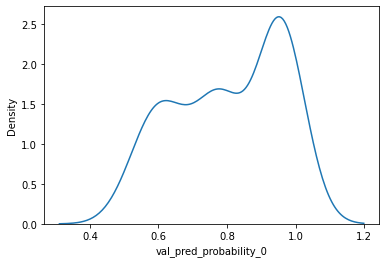

In [30]:
sns.kdeplot(fn.val_pred_probability_0)

In [62]:
reject_thresholds = [0.7,0.75,0.8,0.85,0.9, 0.95]
for threshold in reject_thresholds:
    print("THRESHOLD = {}".format(threshold))
    reject_fp = fp[fp['val_pred_probability_1']<threshold]
    print("Fraction of fp rejects = {}".format(len(reject_fp)/len(fp)))
    reject_tp = tp[tp['val_pred_probability_1']<threshold]
    print("Fraction of tp rejects = {}".format(len(reject_tp)/len(tp)))
    reject_fn = fn[fn['val_pred_probability_0']<threshold]
    print("Fraction of fn rejects = {}".format(len(reject_fn)/len(fn)))
    reject_tn = tn[tn['val_pred_probability_0']<threshold]
    print("Fraction of tn rejects = {}".format(len(reject_tn)/len(tn)))
    print()

THRESHOLD = 0.7
Fraction of fp rejects = 0.45901639344262296
Fraction of tp rejects = 0.015193370165745856
Fraction of fn rejects = 0.2753623188405797
Fraction of tn rejects = 0.029075309818875118

THRESHOLD = 0.75
Fraction of fp rejects = 0.4918032786885246
Fraction of tp rejects = 0.01979742173112339
Fraction of fn rejects = 0.34782608695652173
Fraction of tn rejects = 0.041468064823641564

THRESHOLD = 0.8
Fraction of fp rejects = 0.5245901639344263
Fraction of tp rejects = 0.02716390423572744
Fraction of fn rejects = 0.5362318840579711
Fraction of tn rejects = 0.06387035271687322

THRESHOLD = 0.85
Fraction of fp rejects = 0.6721311475409836
Fraction of tp rejects = 0.049723756906077346
Fraction of fn rejects = 0.5507246376811594
Fraction of tn rejects = 0.07483317445185891

THRESHOLD = 0.9
Fraction of fp rejects = 0.8852459016393442
Fraction of tp rejects = 0.09300184162062615
Fraction of fn rejects = 0.5652173913043478
Fraction of tn rejects = 0.09342230695900858

THRESHOLD = 0.95


In [67]:
reject_threshold = 0.9
reject_fp = fp[fp['val_pred_probability_1']<reject_threshold]
print("Fraction of fp rejects = {}".format(len(reject_fp)/len(fp)))
unrejected_fp_percent = 1 - (len(reject_fp)/len(fp))
print("Fraction of false positives let through: {}".format(unrejected_fp_percent))
print("Overall fraction of false positives let through: {}".format(unrejected_fp_percent*len(fp)/len(comparison_df)))
reject_fn = fn[fn['val_pred_probability_0']<reject_threshold]
print("Fraction of fn rejects = {}".format(len(reject_fn)/len(fn)))
unrejected_fn_percent = 1 - (len(reject_fn)/len(fn))
print("Fraction of false negatives let through: {}".format(unrejected_fn_percent))
print("Overall fraction of false negatives let through: {}".format((len(fn)-len(reject_fn))/len(comparison_df)))

Fraction of fp rejects = 0.8852459016393442
Fraction of false positives let through: 0.11475409836065575
Overall fraction of false positives let through: 0.0015909090909090912
Fraction of fn rejects = 0.5652173913043478
Fraction of false negatives let through: 0.4347826086956522
Overall fraction of false negatives let through: 0.006818181818181818


We can say that reject threshold = 0.9 with random forest, however it still lets 43.4% of the total false negatives through, which is about 0.6% of the total apps - so in future work we can find some approach to classify the remaining apps. If we have time, we can find similar thresholds for feature extracted datasets as well.

# Find a reject threshold for xgboost

In [68]:
xgbmodel = XGBClassifier(random_state=69)
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=69, ...)

In [69]:
y_pred_val_proba = xgbmodel.predict_proba(X_val)
print(y_pred_val_proba)
comparison_df = pd.DataFrame({'val_pred_probability_0':[y[0] for y in y_pred_val_proba], 'val_pred_probability_1':[y[1] for y in y_pred_val_proba], 'val_pred': y_pred_val, 'gt':y_val})

[[1.8042445e-02 9.8195755e-01]
 [3.9666891e-04 9.9960333e-01]
 [1.9389391e-04 9.9980611e-01]
 ...
 [3.4332275e-05 9.9996567e-01]
 [9.4930696e-01 5.0693039e-02]
 [9.9625027e-01 3.7497198e-03]]


In [70]:
comparison_df.head()

,val_pred_probability_0,val_pred_probability_1,val_pred,gt
27040,0.018042,0.981958,1,1
25731,0.000397,0.999603,1,1
15165,0.000194,0.999806,1,1
10699,0.957601,0.042399,0,0
25129,0.000053,0.999947,1,1


In [72]:
fp = comparison_df.loc[(comparison_df['val_pred']==1) & (comparison_df['gt']==0)]
fn = comparison_df.loc[(comparison_df['val_pred']==0) & (comparison_df['gt']==1)]
tp = comparison_df.loc[(comparison_df['val_pred']==1) & (comparison_df['gt']==1)]
tn = comparison_df.loc[(comparison_df['val_pred']==0) & (comparison_df['gt']==0)]

In [73]:
1-((fp.shape[0]/comparison_df.shape[0])+(fn.shape[0]/comparison_df.shape[0]))

0.9704545454545455

In [74]:
import seaborn as sns

<AxesSubplot:xlabel='val_pred_probability_1', ylabel='Density'>

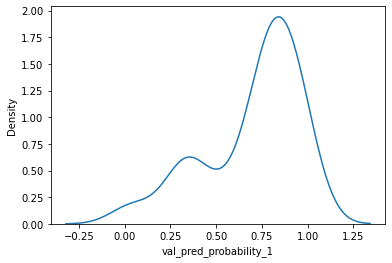

In [75]:
sns.kdeplot(fp.val_pred_probability_1)

<AxesSubplot:xlabel='val_pred_probability_0', ylabel='Density'>

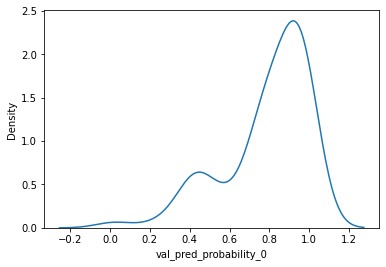

In [76]:
sns.kdeplot(fn.val_pred_probability_0)

In [77]:
reject_thresholds = [0.7,0.75,0.8,0.85,0.9, 0.95]
for threshold in reject_thresholds:
    print("THRESHOLD = {}".format(threshold))
    reject_fp = fp[fp['val_pred_probability_1']<threshold]
    print("Fraction of fp rejects = {}".format(len(reject_fp)/len(fp)))
    reject_tp = tp[tp['val_pred_probability_1']<threshold]
    print("Fraction of tp rejects = {}".format(len(reject_tp)/len(tp)))
    reject_fn = fn[fn['val_pred_probability_0']<threshold]
    print("Fraction of fn rejects = {}".format(len(reject_fn)/len(fn)))
    reject_tn = tn[tn['val_pred_probability_0']<threshold]
    print("Fraction of tn rejects = {}".format(len(reject_tn)/len(tn)))
    print()

THRESHOLD = 0.7
Fraction of fp rejects = 0.32786885245901637
Fraction of tp rejects = 0.017495395948434623
Fraction of fn rejects = 0.2463768115942029
Fraction of tn rejects = 0.020495710200190656

THRESHOLD = 0.75
Fraction of fp rejects = 0.3770491803278688
Fraction of tp rejects = 0.020718232044198894
Fraction of fn rejects = 0.2753623188405797
Fraction of tn rejects = 0.023832221163012392

THRESHOLD = 0.8
Fraction of fp rejects = 0.4918032786885246
Fraction of tp rejects = 0.031767955801104975
Fraction of fn rejects = 0.4782608695652174
Fraction of tn rejects = 0.043374642516682556

THRESHOLD = 0.85
Fraction of fp rejects = 0.6557377049180327
Fraction of tp rejects = 0.05985267034990792
Fraction of fn rejects = 0.5217391304347826
Fraction of tn rejects = 0.053860819828408006

THRESHOLD = 0.9
Fraction of fp rejects = 0.7540983606557377
Fraction of tp rejects = 0.08057090239410682
Fraction of fn rejects = 0.5362318840579711
Fraction of tn rejects = 0.06768350810295519

THRESHOLD = 0.9

In [78]:
reject_threshold = 0.9
reject_fp = fp[fp['val_pred_probability_1']<reject_threshold]
print("Fraction of fp rejects = {}".format(len(reject_fp)/len(fp)))
unrejected_fp_percent = 1 - (len(reject_fp)/len(fp))
print("Fraction of false positives let through: {}".format(unrejected_fp_percent))
print("Overall fraction of false positives let through: {}".format(unrejected_fp_percent*len(fp)/len(comparison_df)))
reject_fn = fn[fn['val_pred_probability_0']<reject_threshold]
print("Fraction of fn rejects = {}".format(len(reject_fn)/len(fn)))
unrejected_fn_percent = 1 - (len(reject_fn)/len(fn))
print("Fraction of false negatives let through: {}".format(unrejected_fn_percent))
print("Overall fraction of false negatives let through: {}".format((len(fn)-len(reject_fn))/len(comparison_df)))

Fraction of fp rejects = 0.7540983606557377
Fraction of false positives let through: 0.24590163934426235
Overall fraction of false positives let through: 0.00340909090909091
Fraction of fn rejects = 0.5362318840579711
Fraction of false negatives let through: 0.46376811594202894
Overall fraction of false negatives let through: 0.007272727272727273


Random forest has better reject thresholds!

# Grid Search

Default used so far:

```Random state: 69
n_estimators: 100 - search this
criterion: 'gini' - search this ['gini', 'entropy', 'logloss']
max_features: 'sqrt' - search this ['sqrt', 'log2', None]
min_samples_leaf: 1 - no because we dont overfit
min_samples_split: 2 - no because we dont overfit
bootstrap: True (N samples with replacement) - no
max_samples: X.shape [0] - no
min_impurity_decrease: 0.0 - no since we dont overfit
```

In [127]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit

In [178]:
X_train_test_concat = pd.concat([X_train, X_test])
y_train_test_concat = pd.concat([y_train, y_test])

In [179]:
X_train.shape

(20532, 86)

In [180]:
X_test.shape

(4400, 86)

In [192]:
X_train_test_concat

Int64Index([ 5237, 26967, 25302, 15056,  5245,  9528, 13045, 27916, 25524,
            14507,
            ...
            19088, 13949,  9273,  5153, 18534, 27626,  4807, 17498,  7043,
            15094],
           dtype='int64', length=24932)

In [183]:
X.shape

(29332, 86)

In [184]:
X_val.shape

(4400, 86)

In [193]:
split_index = [0 if x in X_test.index else -1 for x in X_train_test_concat.index]

In [194]:
len(split_index)

24932

In [195]:
ps = PredefinedSplit(split_index)

In [196]:
param_grid = {
    'criterion': ('gini', 'entropy'), 
    'n_estimators': tuple(range(100, 1100, 100)), 
    'max_features': ('sqrt', 'log2', None)
    }

In [197]:
estimator = RandomForestClassifier(random_state=69)

In [198]:
search = GridSearchCV(estimator=estimator, param_grid=param_grid, verbose=10, cv=ps, scoring='roc_auc')

In [199]:
import pickle

In [201]:
search.fit(X_train_test_concat,y_train_test_concat)

Fitting 1 folds for each of 60 candidates, totalling 60 fits
[CV 1/1; 1/60] START criterion=gini, max_features=sqrt, n_estimators=100........
[CV 1/1; 1/60] END criterion=gini, max_features=sqrt, n_estimators=100; total time=   4.5s
[CV 1/1; 2/60] START criterion=gini, max_features=sqrt, n_estimators=200........
[CV 1/1; 2/60] END criterion=gini, max_features=sqrt, n_estimators=200; total time=   7.1s
[CV 1/1; 3/60] START criterion=gini, max_features=sqrt, n_estimators=300........
[CV 1/1; 3/60] END criterion=gini, max_features=sqrt, n_estimators=300; total time=   9.4s
[CV 1/1; 4/60] START criterion=gini, max_features=sqrt, n_estimators=400........
[CV 1/1; 4/60] END criterion=gini, max_features=sqrt, n_estimators=400; total time=  13.1s
[CV 1/1; 5/60] START criterion=gini, max_features=sqrt, n_estimators=500........
[CV 1/1; 5/60] END criterion=gini, max_features=sqrt, n_estimators=500; total time=  17.7s
[CV 1/1; 6/60] START criterion=gini, max_features=sqrt, n_estimators=600.......

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(random_state=69),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('sqrt', 'log2', None),
                         'n_estimators': (100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000)},
             scoring='roc_auc', verbose=10)

In [202]:
with open('search.pkl', 'wb') as f:
    pickle.dump(search, f, protocol=pickle.HIGHEST_PROTOCOL)

In [203]:
search.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 600}

In [204]:
search.best_score_

0.9918117832210678

In [211]:
# model = search.best_estimator_

In [210]:
model = RandomForestClassifier(criterion='entropy', max_features='sqrt', n_estimators=600)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=600)

In [212]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
roc_auc = roc_auc_score(y_pred, y_test)
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1: {}'.format(f1))
print('ROC AUC: {}'.format(roc_auc))
print()
print()

y_pred_val = model.predict(X_val)
acc_val = accuracy_score(y_pred_val, y_val)
precision_val = precision_score(y_pred_val, y_val)
recall_val = recall_score(y_pred_val, y_val)
f1_val = f1_score(y_pred_val, y_val)
roc_auc_val = roc_auc_score(y_pred_val, y_val)
print('VALIDATION')
print('Accuracy: {}'.format(acc_val))
print('Precision: {}'.format(precision_val))
print('Recall: {}'.format(recall_val))
print('F1: {}'.format(f1_val))
print('ROC AUC: {}'.format(roc_auc_val))

Accuracy: 0.9704545454545455
Precision: 0.9700874367234238
Recall: 0.9700874367234238
F1: 0.9700874367234238
ROC AUC: 0.9704500946526863


VALIDATION
Accuracy: 0.9697727272727272
Precision: 0.9692101740294511
Recall: 0.9713774597495528
F1: 0.9702926066562431
ROC AUC: 0.9697460311686766


In [208]:
with open('best_model.pkl', 'wb') as f:
    pickle.dump(search.best_estimator_, f, protocol=pickle.HIGHEST_PROTOCOL)

In [209]:
print(model)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=600, random_state=69)
